<a href="https://colab.research.google.com/github/joshimohitm9/Feature-Engineering/blob/main/feature_engg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df={
    "sq_ft":[2300,3100,2700,2400,2200,2400,2200],
    "price_in_lakh":[90,150,105,78,89,78,89],
    "bedroom":[2,3,3,np.nan,2,np.nan,3]
}

In [ ]:
df=pd.DataFrame(df)
df

,sq_ft,price_in_lakh,bedroom
0,2300,90,2.0
1,3100,150,3.0
2,2700,105,3.0
3,2400,78,NaN
4,2200,89,2.0
5,2400,78,NaN
6,2200,89,3.0


In [ ]:
df["bedroom"].median()

3.0

In [ ]:
df.fillna(df["bedroom"].median())

,sq_ft,price_in_lakh,bedroom
0,2300,90,2.0
1,3100,150,3.0
2,2700,105,3.0
3,2400,78,3.0
4,2200,89,2.0
5,2400,78,3.0
6,2200,89,3.0


In [ ]:
url="https://raw.githubusercontent.com/codebasics/py/master/ML/FeatureEngineering/1_outliers/heights.csv"
df=pd.read_csv(url)

In [ ]:
df

,name,height
0,mohan,5.9
1,maria,5.2
2,sakib,5.1
3,tao,5.5
4,virat,4.9
5,khusbu,5.4
6,dmitry,6.2
7,selena,6.5
8,john,7.1
9,imran,14.5


In [ ]:
df.head()

,name,height
0,mohan,5.9
1,maria,5.2
2,sakib,5.1
3,tao,5.5
4,virat,4.9


In [ ]:
df["height"].max()

14.5

In [ ]:
df["height"].min()

1.2

In [ ]:
df["height"].describe()

count    14.000000
mean      6.050000
std       2.779804
min       1.200000
25%       5.250000
50%       5.550000
75%       6.175000
max      14.500000
Name: height, dtype: float64

In [ ]:
max_error=df[df["height"]>df["height"].quantile(0.95)]
max_error

,name,height
9,imran,14.5


In [ ]:
min_error=df[df["height"]<df["height"].quantile(0.05)]
min_error

,name,height
12,yoseph,1.2


In [ ]:
new_df=df[(df["height"] < df["height"].quantile(0.95)) & (df["height"]>df["height"].quantile(0.05))]
new_df=new_df.reset_index(drop=True)
new_df

,name,height
0,mohan,5.9
1,maria,5.2
2,sakib,5.1
3,tao,5.5
4,virat,4.9
5,khusbu,5.4
6,dmitry,6.2
7,selena,6.5
8,john,7.1
9,jose,6.1


In [ ]:
url1="https://raw.githubusercontent.com/codebasics/py/master/ML/FeatureEngineering/1_outliers/bhp.csv"
df=pd.read_csv(url1)
df

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [ ]:
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [ ]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920337e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267000e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438000e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [ ]:
max_threshold,min_threshold=df["price_per_sqft"].quantile([0.99,0.01])
max_threshold,min_threshold

(23674.45000000001, 2549.0)

In [ ]:
new_df = df[(df.price_per_sqft > min_threshold) & (df.price_per_sqft < max_threshold)]
new_df=new_df.reset_index(drop=True)
new_df

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
12927,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
12928,other,4 BHK,3600.0,5.0,400.00,4,11111
12929,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
12930,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [ ]:
# 3 standard daviation
url="https://raw.githubusercontent.com/codebasics/py/master/ML/FeatureEngineering/2_outliers_z_score/heights.csv"
df=pd.read_csv(url)
df

,gender,height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796
...,...,...
9995,Female,66.172652
9996,Female,67.067155
9997,Female,63.867992
9998,Female,69.034243


In [ ]:
import seaborn as sns

<Axes: xlabel='height', ylabel='Count'>

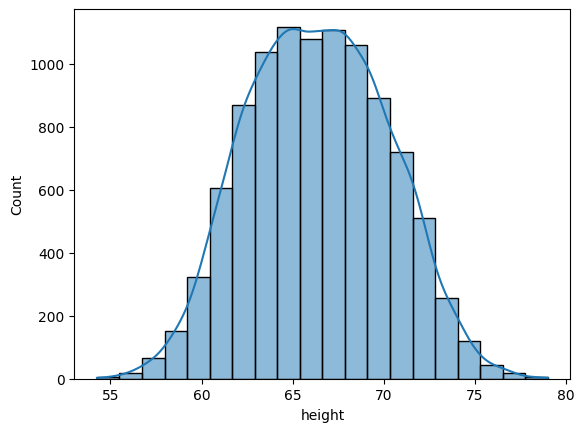

In [ ]:
sns.histplot(df.height,bins =20,kde=True)

In [ ]:
df.head()

,gender,height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796


In [ ]:
df.describe()

,height
count,10000.000000
mean,66.367560
std,3.847528
min,54.263133
25%,63.505620
50%,66.318070
75%,69.174262
max,78.998742


In [ ]:
upper_limit = df.height.mean() + 3*df.height.std()
upper_limit

77.91014411725271

In [ ]:
lower_limit=df.height.mean()-3*df.height.std()
lower_limit

54.824975392479274

In [ ]:
df=df[(df.height > lower_limit) & (df.height < upper_limit )]
df.shape

(9993, 2)

In [ ]:
df=df.reset_index(drop=True)
df.describe()

,height
count,9993.000000
mean,66.363856
std,3.835511
min,54.873728
25%,63.505894
50%,66.317755
75%,69.169353
max,77.547186


In [ ]:
# Z score
df["z_score"]=(df.height -df.height.mean())/df.height.std()


In [ ]:
df[df["z_score"]<-3]

,gender,height,z_score


In [ ]:
df[df["z_score"]>3]

,gender,height,z_score


In [ ]:
#iqr
q1,q3=df.height.quantile([0.25,0.75])
IQR =q3-q1
IQR


5.66345827

In [ ]:
Lower_limit= q1-1.5*IQR
upper_limit=q3+1.5*IQR

In [ ]:
df=df[(df.height > Lower_limit) & (df.height < upper_limit)]

In [ ]:
df

,gender,height,z_score
0,Male,73.847017,1.951021
1,Male,68.781904,0.630437
2,Male,74.110105,2.019613
3,Male,71.730978,1.399324
4,Male,69.881796,0.917202
...,...,...,...
9988,Female,66.172652,-0.049851
9989,Female,67.067155,0.183365
9990,Female,63.867992,-0.650725
9991,Female,69.034243,0.696227
